<a href="https://colab.research.google.com/github/latte05/ML_training/blob/master/OpenCV2_find_contours(%E8%BC%AA%E9%83%AD%E6%8A%BD%E5%87%BA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# add flower.jpg
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving flower.jpg to flower.jpg
User uploaded file "flower.jpg" with length 28353 bytes


In [6]:
# add letter01.png
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving letter01.png to letter01.png
User uploaded file "letter01.png" with length 212222 bytes


In [49]:
ls

 flower.jpg  'hagaki1 (1).png'   hagaki1.png   letter01.png   sample_data/


In [7]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1,64))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = svm.LinearSVC()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9583333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
from sklearn.externals import joblib

joblib.dump(clf, 'digits.pkl')


['digits.pkl']

In [55]:
ls

 digits.pkl  'hagaki1 (1).png'   letter01.png
 flower.jpg   hagaki1.png        sample_data/


124 113 176 56
61 64 31 26
98 53 97 116


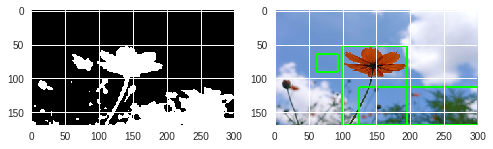

In [9]:
#find contours
#物体の輪郭を抽出
import cv2
import matplotlib.pyplot as plt


#import image file and resize
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))


# IMPORTANT: change the color to binary 
# -change color to gray
# -use GaussianBlur function　平滑化、ぼかして複雑な模様を消す
# -2値化は threshold() func

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]


# GaussianBlur is good for whitenoise removal
# there is other cv2.blur() and cv2.medianBlur(), cv2.bilateralFilter() 
# 
# Gaussian Filter
# img = cv2.GaussianBlur(img, (ax, ay), sigma_x)
#   (ax, ay) 平滑化する画素の周囲
#   sigma_x = 横方向の標準偏差 0の場合はカーネルのサイズから自動的に計算
#   cv2.bilateralFilter 関数: エッジを残したまま画像をぼかすが、処理速度は遅くなる

#　閾値処理 - 画像の２値化
#  画素が指定の閾値より大きい場合は白、小さければ黒
#
# ret, img = cv2.threshold(img, thresh, maxval, type)
#
# img = gray scale image
# thresh = threahold
# maxval = しきい値以上の値を持つ値に対して割り当てる値を指定
# type = どのような閾値処理をするか - ThRESH_BINARY_INV を指定した場合は 0 それ以外の場合は maxval の値
#



plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

#find contours
#
# images, contours, hierachy = cv2.findContours(image, mode, method)
#   - image = input image
#   - mode = 
#      - cv2.RETR_LIST - 単純輪郭の検出
#      - cv2.RETR_EXTERNAL - 最も外側の輪郭のみ検出
#      - cv2.RETR_CCOMP - 階層を考慮し、２レベルの輪郭を検出
#      - cv2.RETR_TREE - すべての輪郭を検出し、階層構造を保持
#   - method
#      - CHAIN_APPROX_NONE - 輪郭のすべての点を検出
#      - CHAIN_APPROX_SIMPLE - 不必要な点を削除、必要最低限の点だけ返す (ほぼこちら)


cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]





#drawing
for pt in cnts:
  x, y, w, h = cv2.boundingRect(pt)
  if w < 30 or w > 200: continue
  print(x, y, w, h)
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [0]:
import cv2
import matplotlib.pyplot as plt

def detect_zipno(fname):
  img = cv2.imread(fname)
  h, w = img.shape[:2]
  img = img[0:h//2, w//3:] # cut only upper half, 1/3 from right
  
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray, (3,3), 0)
  im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
  
  cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
  
  result = []
  
  for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    
    # remvoe too small or too large width 
    if not(50 < w < 70): continue
      
    # for debug
    #print(result)
    # sorting from left
    result = sorted(result, key=lambda x: x[0])
    #print(result)
    result.append([x, y, w, h])
 

  result2 = []
  lastx = -100
  for x, y, w, h in result:
    if (x - lastx) < 10: continue
    result2.append([x, y, w, h])
    lastx = x
    

  for x, y, w, h in result2:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 3)
    
  return result2, img

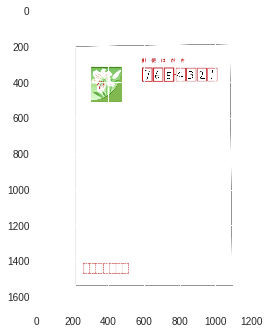

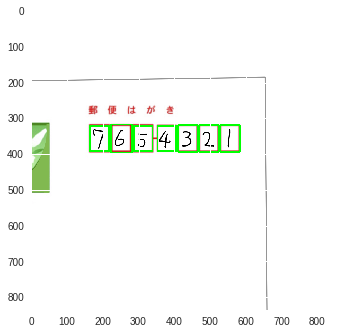

In [12]:
if __name__ == '__main__':
  
  
  img = cv2.imread("letter01.png")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()
  
  cnts, img = detect_zipno("letter01.png")
  
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()
  
  

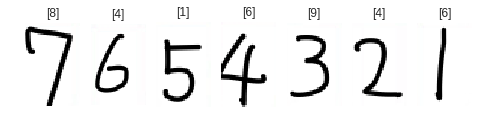

In [13]:
from sklearn.externals import joblib

clf = joblib.load("digits.pkl")

cnts, img = detect_zipno("letter01.png")

for i, pt in enumerate(cnts):
  x, y, w, h = pt
  x += 8
  y += 8
  w -= 16
  h -= 16
  im2 = img[y:y+h, x:x+w]
  im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  im2gray = cv2.resize(im2gray, (8,8))
  im2gray = 15 - im2gray // 16 # white to black
  im2gray = im2gray.reshape((-1,64))
  
  res = clf.predict(im2gray)
  
  plt.subplot(1, 7, i + 1)
  plt.imshow(im2)
  plt.axis("off")
  plt.title(res)
  
plt.show()